In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 3.1
*Part A*

In [2]:
n = 0.05 #num moles
Va = 0.0001 #Volume (m^3)
Th = 400 #Temp (K)
Vb = 0.0003 #Volume (m^3)
Vc = 0.0005 #Volume (m^3)
Tc = 284.5 #Temp (K)
Vd = 0.000167 #Volume (m^3)
R = 8.3145 #IDG const. J/m^3*K

#Heatflow into engine:
q_out = n*R*Th*np.log(Va/Vb) #Heat in Joules
q_in = -q_out
print(q_in)

182.68823748261997


*Part B*

In [3]:
#work done by engine
w_carnot_cycle = -n*R*Th*np.log(Va/Vb) - n*R*Tc*np.log(Vc/Vd) #Work in Joules
print(w_carnot_cycle)

52.98753986550585


*Part D*

Text(0.5, 1.0, 'Heat vs. Entropy for Carnot Cycle')

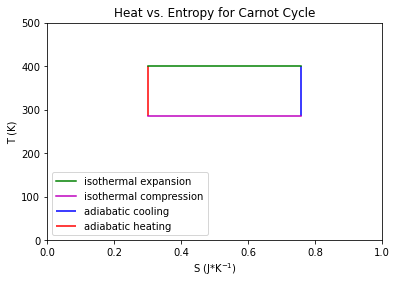

In [4]:
S_a = 0.3 #J/K
DeltS_Th = n*R*np.log(Vb/Va) #J/K
S_b = DeltS_Th + S_a #J/K
DeltS_Tc = n*R*np.log(Vd/Vc) #J/K
S_c = S_b
S_d = DeltS_Tc + S_c

Sh = np.linspace(S_a, S_b, 100)
Ths = [Th for x in range(100)]

Sc = np.linspace(S_c, S_d, 100)
Tcs = [Tc for x in range(100)]

plt.plot(Sh, Ths, label="isothermal expansion", color = 'g')
plt.vlines(x = S_b, ymax = Th, ymin = Tc, color = 'b', label="adiabatic cooling")
plt.plot(Sc, Tcs, label="isothermal compression", color = 'm')
plt.vlines(x = S_d, ymax = Th, ymin = Tc, color = 'r', label="adiabatic heating")
plt.axis([0,1,0,500])
plt.ylabel("T (K)")
plt.xlabel("S (J*K$^{-1}$)")
plt.legend()
plt.title("Heat vs. Entropy for Carnot Cycle")

*Part E*

In [5]:
A = (S_b - S_a) * (Th - Tc) #Simple area formula: Delta_Y * Delta_X
print(A) #J (about equal to work!)

52.75122857310652


### Problem 3.2


In [6]:
T_initial = 25 + 273.15 #C -> K
T_final = 100 + 273.15 #C -> K
V_initial = 0.5 * 0.001 #L -> m^3
V_final = 1 * 0.001 #L -> m^3
P_initial = 1 * 101325 #Atm -> Pa
n = P_initial * V_initial / (R * T_initial)


Cv = (3/2) * n * R #Assume Ar behaves as a monoatomic idg
Cp = Cv + n*R

Del_S_isochoric = Cv*np.log(T_final / T_initial)
Del_S_isobaric = Cp*np.log(V_final / V_initial)
Del_S_tot = Del_S_isochoric + Del_S_isobaric
print(Del_S_tot) #Total Entropy Change in J/K

0.3516457707793893


### Problem 3.3
*Part A*

In [7]:
Ntot = 10
Vtot = 60
nL = 10
VL = 10
nR = 20
VR = Vtot - VL

def n_choose_k(n, k):
    return np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k))

def Boltzmann_Entropy(W):
    Avog = 6.022e23
    return (R/Avog)*np.log(W)

def Find_Entropy_Stats(nL, ntot, VL, Vtot):
    W_Left = n_choose_k(VL, nL) #Multiplicity of Left
    W_Right = n_choose_k(Vtot-VL, ntot-nL) #Multiplicity of Right
    W_Tot = W_Left * W_Right
    
    S_Left = Boltzmann_Entropy(W_Left)
    S_Right = Boltzmann_Entropy(W_Right)
    S_Total = S_Left + S_Right
    return (W_Left, W_Right, W_Tot, S_Left, S_Right, S_Total)
    

print("Left Mult.:\t{}\nRight Mult.:\t{}\nTotal Mult.:\t{}\n\nLeft S:\t\t{}\nRight S:\t{}\nTotal S:\t{}".format(*Find_Entropy_Stats(nL, nL+nR, VL, Vtot)))







Left Mult.:	1.0
Right Mult.:	47129212243960.0
Total Mult.:	47129212243960.0

Left S:		0.0
Right S:	4.346944605367547e-22
Total S:	4.346944605367547e-22


*Part B*
##### The equilibrium position will lie where entropy (S) is maximized. From the plot shown below, this is at V$_L$=20 and V$_R$=40 

Text(0.5, 1.0, 'Entropy Dependence on Number of Cells in \nLeft Subsystem (V$_L$) where n$_L$=10, n$_{tot}$=30, and V$_{tot}$=60  \n')

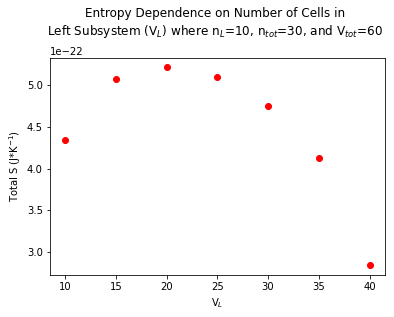

In [24]:
Vls = [x*5 + 10 for x in range(0,7)]
S_total_vals = [Find_Entropy_Stats(nL, nL+nR, y, Vtot)[5] for y in Vls]
plt.plot(Vls, S_total_vals, 'or')
plt.xlabel("V$_L$")
plt.ylabel("Total S (J*K$^{-1}$)")
plt.title("Entropy Dependence on Number of Cells in \nLeft Subsystem (V$_L$) where n$_L$=10, n$_{tot}$=30, and V$_{tot}$=60  \n")

